# networkx

In [2]:
import networkx as nx

nx.__version__

'3.4.2'

In [3]:
G = nx.Graph()  # creates an empty graph

In [83]:
import pandas as pd
edges = pd.DataFrame({
    'weight': [1, 2, 3],
    'src': ['a', 'c', 'd'],
    'tgt': ['b', 'b', 'e'],
})
edges


,weight,src,tgt
0,1,a,b
1,2,c,b
2,3,d,e


In [52]:
G = nx.from_pandas_edgelist(df=edges, source='src', target='tgt', edge_attr=["weight"])
G

In [60]:
print(G.nodes())
print(G.number_of_nodes())

['a', 'b', 'c', 'd', 'e']
5


In [61]:

print(G.edges())
print(G.number_of_edges())

[('a', 'b'), ('b', 'c'), ('d', 'e')]
3


In [70]:
G.edges(data=True)

EdgeDataView([('a', 'b', {'weight': 1}), ('b', 'c', {'weight': 2}), ('d', 'e', {'weight': 3})])

In [69]:
nx.get_edge_attributes(G, 'weight')

{('a', 'b'): 1, ('b', 'c'): 2, ('d', 'e'): 3}

In [54]:
nx.connected_components(G)

<generator object connected_components at 0x128eed240>

In [55]:
components = [sorted(list(x)) for x in nx.connected_components(G)]
components

[['a', 'b', 'c'], ['d', 'e']]

In [56]:
components = pd.DataFrame({'component': range(len(components)), 'nodes': components})
components

,component,nodes
0,0,"[a, b, c]"
1,1,"[d, e]"


In [76]:
components = components.explode('nodes', ignore_index=True).rename(columns={'nodes': 'node'})
components
    


,component,node
0,0,a
1,0,b
2,0,c
3,1,d
4,1,e


In [21]:
[G.subgraph(c).copy() for c in nx.connected_components(G)]

In [77]:
components['component']

0    0
1    0
2    0
3    1
4    1
Name: component, dtype: int64

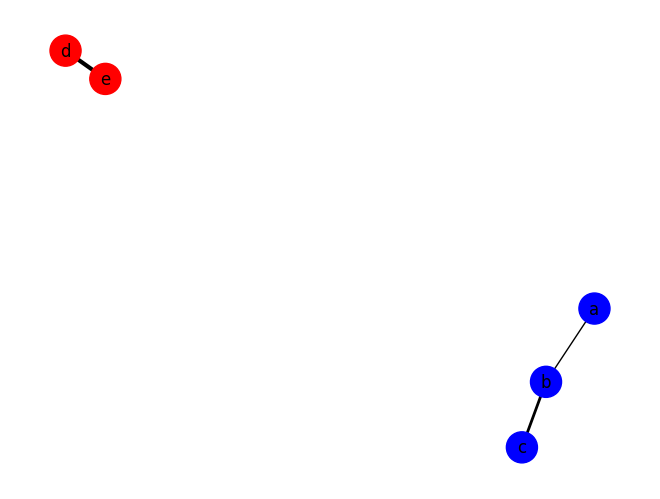

In [86]:
nx.draw(
    G, 
    pos = nx.spring_layout(G, seed=42), 
    with_labels = True,
    width = edges['weight'],
    node_color = components['component'].map({0: 'blue', 1: 'red'}),
    node_size = 500,
)